# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.396  1  0.614 0.434 0.003   
                             age        0.058  1  0.090 0.764 0.000   
                             Kiel       2.158  1  3.345 0.069 0.017   
                             Magdeburg  5.616  1  8.704 0.004 0.044   
                             Sweden     8.810  1 13.654 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.799  1  0.966 0.327 0.005   
                             age        1.261  1  1.523 0.219 0.008   
                             Kiel       0.022  1  0.027 0.871 0.000   
                             Magdeburg  1.176  1  1.420 0.235 0.007   
                             Sweden    15.880  1 19.179 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.362  0.595    False  
                             age               0.117  0.852    False  
                             Kiel              1.161  0.157    False  
                             Magdeburg         2.447  0.015     True  
                             Sweden            3.542  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.485  0.494    False  
                             age               0.660  0.371    False  
                             Kiel              0.060  0.923    False  
                             Magdeburg         0.629  0.392    False  
                             Sweden            4.708  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.939  1  6.504 0.012 0.033   
                             age        0.007  1  0.051 0.822 0.000   
                             Kiel       0.328  1  2.272 0.133 0.012   
                             Magdeburg  0.640  1  4.435 0.037 0.023   
                             Sweden     1.994  1 13.805 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.930  1  3.970 0.048 0.020   
                             age        0.535  1  1.100 0.296 0.006   
                             Kiel       2.591  1  5.328 0.022 0.027   
                             Magdeburg  2.473  1  5.087 0.025 0.026   
                             Sweden    17.733  1 36.475 0.000 0.160   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.937  0.031     True  
                             age               0.085  0.882    False  
                             Kiel              0.875  0.230    False  
                             Magdeburg         1.438  0.080    False  
                             Sweden            3.575  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.321  0.100    False  
                             age               0.529  0.427    False  
                             Kiel              1.657  0.053    False  
                             Magdeburg         1.598  0.060    False  
                             Sweden            8.101  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.012         1.937  0.031     True   
                             age       0.822         0.085  0.882    False   
                             Kiel      0.133         0.875  0.230    False   
                             Magdeburg 0.037         1.438  0.080    False   
                             Sweden    0.000         3.575  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.048         1.321  0.100    False   
                             age       0.296         0.529  0.427    False   
                             Kiel      0.022         1.657  0.053    False   
                             Magdeburg 0.025         1.598  0.060    False   
                             Sweden    0.000         8.101  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.434         0.362  0.595    False  
                             age       0.764         0.117  0.852    False  
                             Kiel      0.069         1.161  0.157    False  
                             Magdeburg 0.004         2.447  0.015     True  
                             Sweden    0.000         3.542  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.327         0.485  0.494    False  
                             age       0.219         0.660  0.371    False  
                             Kiel      0.871         0.060  0.923    False  
                             Magdeburg 0.235         0.629  0.392    False  
                             Sweden    0.000         4.708  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.226         3.264     0.281     0.261         2.476     0.338
std       0.294         6.213     0.321     0.302         5.332     0.330
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.396     0.002     0.004         0.329     0.016
50%       0.063         1.201     0.126     0.120         0.922     0.239
75%       0.402         3.234     0.536     0.468         2.404     0.624
max       1.000        86.431     1.000     1.000       145.087     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.012         1.937   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.508   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.318         0.498   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.261         0.583   
A0A075B6H7                                         AD     0.001         3.197   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.131         0.882   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.447         0.350   
S4R3U6                                             AD     0.048         1.321   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.031     True   
A0A024R0T9;K7ER74;P02655                           AD      0.071    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.451    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.388    False   
A0A075B6H7                                         AD      0.003     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.227    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.577    False   
S4R3U6                                             AD      0.100    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.434         0.362   
A0A024R0T9;K7ER74;P02655                           AD     0.055         1.256   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.131         0.884   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.518         0.286   
A0A075B6H7                                         AD     0.147         0.831   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.028         1.551   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.288         0.540   
S4R3U6                                             AD     0.327         0.485   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.595    False  
A0A024R0T9;K7ER74;P02655                           AD      0.132    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.255    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.666    False  
A0A075B6H7                                         AD      0.279    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.234         1.615     0.295     0.256         1.397     0.339
std       0.289         1.882     0.313     0.293         1.635     0.318
min       0.000         0.003     0.000     0.000         0.000     0.000
25%       0.007         0.390     0.020     0.012         0.362     0.041
50%       0.083         1.079     0.158     0.120         0.921     0.240
75%       0.407         2.151     0.541     0.435         1.904     0.596
max       0.993        23.391     0.995     1.000        24.061     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,936,1036


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.012         1.937  0.031   
A0A024R0T9;K7ER74;P02655                           0.031         1.508  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.318         0.498  0.451   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.261         0.583  0.388   
A0A075B6H7                                         0.001         3.197  0.003   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.131         0.882  0.227   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.447         0.350  0.577   
S4R3U6                                             0.048         1.321  0.100   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.434   
A0A024R0T9;K7ER74;P02655                              False 0.055   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.131   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.518   
A0A075B6H7                                             True 0.147   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.028   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.288   
S4R3U6                                                False 0.327   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.362  0.595   
A0A024R0T9;K7ER74;P02655                                   1.256  0.132   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.884  0.255   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.286  0.666   
A0A075B6H7                                                 0.831  0.279   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.551  0.077   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.540  0.453   
S4R3U6                                                     0.485  0.494   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    888
CF (yes) - PI (yes)   337
CF (yes) - PI (no)    148
CF (no)  - PI (yes)    48
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.012         1.937  0.031     True 0.434   
A0A075B6H7                   0.001         3.197  0.003     True 0.147   
A0A075B6I0                   0.001         3.182  0.003     True 0.030   
A0A075B6Q5                   0.015         1.820  0.039     True 0.984   
A0A075B6R2                   0.001         3.179  0.003     True 0.294   
...                            ...           ...    ...      ...   ...   
Q9UIW2                       0.016         1.789  0.041     True 0.568   
Q9UJ14                       0.018         1.736  0.045     True 0.035   
Q9UNW1                       0.491         0.309  0.618    False 0.014   
Q9UP79                       0.000         4.372  0.000     True 0.233   
Q9UQ52                       0.001         3.199  0.003     True 0.104   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.362  0.595    False       186  
A0A075B6H7                           0.831  0.279    False        91  
A0A075B6I0                           1.526  0.081    False       194  
A0A075B6Q5                           0.007  0.990    False       104  
A0A075B6R2                           0.532  0.459    False       164  
...                                    ...    ...      ...       ...  
Q9UIW2                               0.246  0.707    False       162  
Q9UJ14                               1.459  0.091    False       169  
Q9UNW1                               1.857  0.044     True       171  
Q9UP79                               0.632  0.390    False       135  
Q9UQ52                               0.983  0.216    False       188  

[196 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.031,0.595,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.071,0.132,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.451,0.255,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.388,0.666,196,CF (no) - PI (no)
A0A075B6H7,0.003,0.279,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.317,197,CF (no) - PI (no)
Q9Y6X5,0.227,0.077,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087WXE9;E9PQ70;Q6UXH9;Q6UXH9-2;Q6UXH9-3,0.011,0.994,108,CF (yes) - PI (no),0.983
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.973,134,CF (yes) - PI (no),0.973
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.031,0.982,60,CF (yes) - PI (no),0.951
A0A075B6Q5,0.039,0.990,104,CF (yes) - PI (no),0.951
Q14165,0.959,0.030,133,CF (no) - PI (yes),0.929
...,...,...,...,...,...
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.009
K7ERG9;P00746,0.043,0.052,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


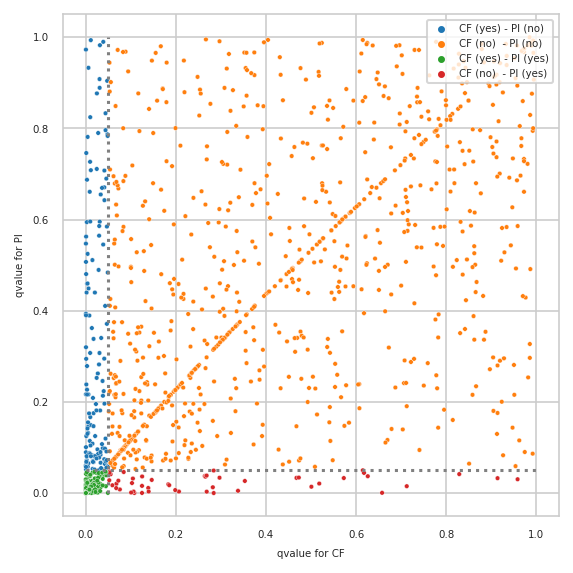

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


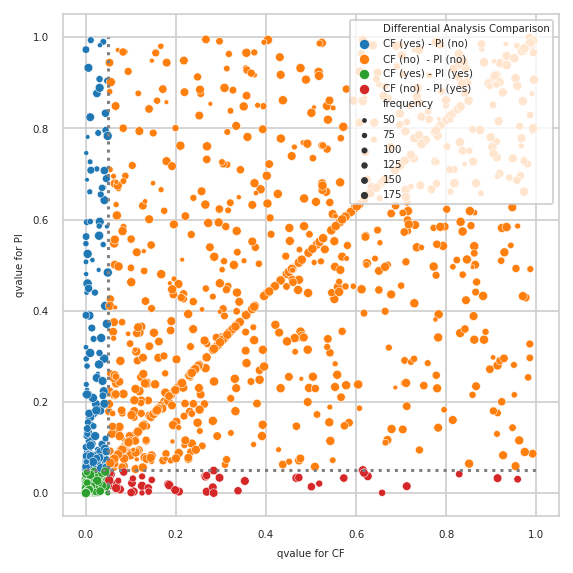

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out